In [362]:
import os
os.environ["OMP_NUM_THREADS"] = "3"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from scipy.stats import MonteCarloMethod
import statsmodels.api as sm

In [363]:
os.chdir('C://Users/ordav/Desktop/ML_Projects/titanic')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
testOrg = pd.read_csv('test.csv')

In [364]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [365]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


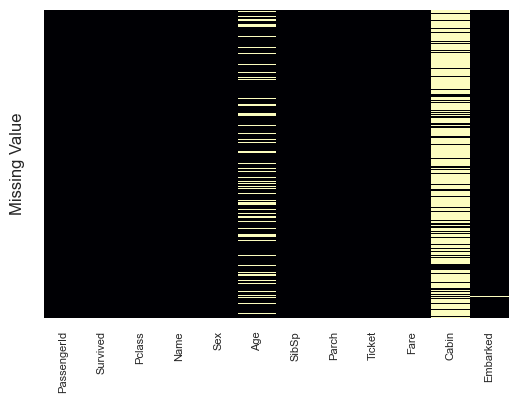

In [366]:
sns.set(rc={'figure.figsize':(6, 4)}) 
NAsHeatmap = sns.heatmap(train.isnull(), cmap = 'magma', cbar=False)
plt.xticks(rotation=90, fontsize=8)
NAsHeatmap.set(yticklabels = [])
NAsHeatmap.set_ylabel('Missing Value')
NAsHeatmap.tick_params(left=False)

In [367]:
train = train.drop(['Ticket'], axis = 1)
test_id = test['PassengerId']
test = test.drop(['Ticket'], axis = 1)

In [368]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [369]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [370]:
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

In [371]:
train.loc[train.Embarked.isna(), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [372]:
np.sum(train['Fare'] == 0)

15

In [373]:
train['Fare'] = train['Fare'].replace(0, value = np.nan)
test['Fare'] = test['Fare'].replace(0, value = np.nan)

In [374]:
train.loc[:, 'Embarked'] = train.loc[:, 'Embarked'].fillna(train.loc[train.Pclass == 1, 'Embarked'].mode()[0])

In [375]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(train[['Embarked']])
train = train.join(pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out()).iloc[:, [1, 2]])

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(test[['Embarked']])
test = test.join(pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out()).iloc[:, [1, 2]])

In [376]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(train[['Sex']])
train = train.join(pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out()).iloc[:, 1])

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(test[['Sex']])
test = test.join(pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out()).iloc[:, 1])

In [377]:
EmbarkedColTrain = train.Embarked 
EmbarkedColTest = test.Embarked

SexColTrain = train.Sex
SexColTest = test.Sex

NameColTrain = train.Name
NameColTest = test.Name

IdColTrain = train.PassengerId
IdColTest = test.PassengerId

train.drop(['Embarked', 'Sex', 'Name', 'PassengerId'], inplace = True, axis = 1)
test.drop(['Embarked','Sex', 'Name', 'PassengerId'], inplace = True, axis = 1)

In [378]:
y_train = train.Survived
train.drop('Survived', inplace = True, axis = 1)

In [379]:
train

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,7.2500,0.0,1.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,0.0,1.0,0.0
3,1,35.0,1,0,53.1000,0.0,1.0,0.0
4,3,35.0,0,0,8.0500,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0.0,1.0,1.0
887,1,19.0,0,0,30.0000,0.0,1.0,0.0
888,3,NaN,1,2,23.4500,0.0,1.0,0.0
889,1,26.0,0,0,30.0000,0.0,0.0,1.0


<Axes: xlabel='Age', ylabel='Count'>

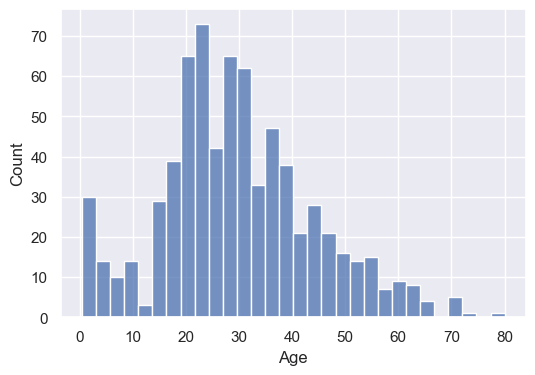

In [380]:
sns.histplot(x = 'Age', data = train, bins = 30)

In [381]:
X_train = train.copy()
X_test = test.copy()

In [382]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.ensemble import RandomForestRegressor

### Using the imputer
rFor = RandomForestRegressor(n_estimators=300)
imputer = IterativeImputer(estimator=rFor, tol = 1)
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns = test.columns)


In [383]:
train = X_train.copy()
test = X_test.copy()

<Axes: xlabel='Age', ylabel='Count'>

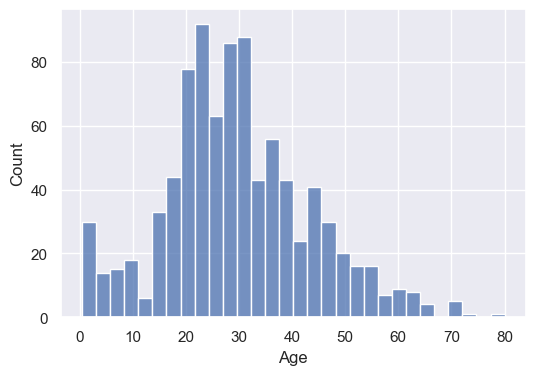

In [384]:
sns.histplot(x = 'Age', data = train, bins = 30)

In [385]:
train['Survived'] = y_train
train['Embarked'] = EmbarkedColTrain
test['Embarked'] = EmbarkedColTest
train['Name'] = NameColTrain
test['Name'] = NameColTest
train['PassengerId'] = IdColTrain
test['PassengerId'] = IdColTest

d = {0:'Female', 1:'Male'}

train['Sex'] = train.Sex_male.map(d)
test['Sex'] = test.Sex_male.map(d)

train.drop(['Embarked_Q', 'Embarked_S', 'Sex_male'], inplace = True, axis = 1)
test.drop(['Embarked_Q', 'Embarked_S', 'Sex_male'], inplace = True, axis = 1)

In [386]:
def title(x):
    l = str.split(x)
    for j in range(len(l)):
        if l[j][-1] == ',':
            return l[j+1]

train['title'] = train.apply(lambda x: title(x['Name']), axis = 1)
test['title'] = test.apply(lambda x: title(x['Name']), axis = 1)

train.loc[(train.title != 'Mr.') & (train.title != 'Mrs.') & (train.title != 'Miss.') & (train.title != 'Master.'), ['Name', 'title', 'PassengerId']]

,Name,title,PassengerId
30,"Uruchurtu, Don. Manuel E",Don.,31
149,"Byles, Rev. Thomas Roussel Davids",Rev.,150
150,"Bateman, Rev. Robert James",Rev.,151
245,"Minahan, Dr. William Edward",Dr.,246
249,"Carter, Rev. Ernest Courtenay",Rev.,250
317,"Moraweck, Dr. Ernest",Dr.,318
369,"Aubart, Mme. Leontine Pauline",Mme.,370
398,"Pain, Dr. Alfred",Dr.,399
443,"Reynaldo, Ms. Encarnacion",Ms.,444
449,"Peuchen, Major. Arthur Godfrey",Major.,450


In [387]:
def TitleTrain(x,y):
    if x in ['Mr.', 'Mrs.', 'Miss.', 'Master.']:
        return x
    elif y  in [370 , 444, 557, 760]:
        return 'Mrs.'
    elif y in [642, 711]:
        return 'Miss.'
    else:
        return 'Mr.'

train['Title'] = train.apply(lambda x: TitleTrain(x['title'], x['PassengerId']), axis = 1)

In [388]:
test.loc[(test.title != 'Mr.') & (test.title != 'Mrs.') & (test.title != 'Miss.') & (test.title != 'Master.'), ['Name', 'title', 'PassengerId']]

,Name,title,PassengerId
88,"O'Donoghue, Ms. Bridget",Ms.,980
131,"Gracie, Col. Archibald IV",Col.,1023
149,"Lahtinen, Rev. William",Rev.,1041
164,"Peruschitz, Rev. Joseph Maria",Rev.,1056
202,"Astor, Col. John Jacob",Col.,1094
293,"Dodge, Dr. Washington",Dr.,1185
414,"Oliva y Ocana, Dona. Fermina",Dona.,1306


In [389]:
def TitleTest(x,y):
    if x in ['Mr.', 'Mrs.', 'Miss.', 'Master.']:
        return x
    elif y  == 1306:
        return 'Mrs.'
    elif y  == 980:
        return 'Miss.'
    else:
        return 'Mr.'

test['Title'] = test.apply(lambda x: TitleTest(x['title'], x['PassengerId']), axis = 1)

In [390]:
def lastName(x):
    l = str.split(x)
    for j in range(len(l)):
        if l[j][-1] == ',':
            if j == 0:
                return l[j]
            elif j == 1:
                return l[0] + l[1]
            elif j == 2:
                return l[0] + l[1] + l[2]
            else:
                print('Wrong Parsing')

train['LastName'] = train.apply(lambda x: lastName(x['Name']), axis = 1)
test['LastName'] = test.apply(lambda x: lastName(x['Name']), axis = 1)

train.drop(['Name', 'title', 'PassengerId'], axis = 1, inplace = True)
test.drop(['Name', 'title', 'PassengerId'], axis = 1, inplace = True)

In [392]:
# First, compute aggregated stats for each family in train:
family_stats = train.groupby('LastName')['Survived'].agg(
    total_survived='sum',
    family_count='count'
)

# Define a function for the train rows. For each row, we exclude itself.
def assign_train_outcome(row):
    stats = family_stats.loc[row['LastName']]
    # No other family members available
    if (stats['family_count'] == 1) or (row['Parch'] + row['SibSp'] == 0):
        return 1
    stats = family_stats.loc[row['LastName']]
    # Compute survivors among other members (excluding self)
    others_survived = stats['total_survived'] - row['Survived']
    if others_survived > 0:
        return 2
    else:
        return 0

# Apply the function to each row in train
train['FamilyOutcome'] = train.apply(assign_train_outcome, axis=1)

# For the test dataframe, we have no individual survival info.
# We simply use the aggregated family stats from train.
def assign_test_outcome(family, P, S):
    # If the family is not seen in train, we have no information.
    if (family not in family_stats.index) or ((P + S) == 0):
        return 1
    stats = family_stats.loc[family]
    # If any passenger in train (for this family) survived, assume family survival.
    if stats['total_survived'] > 0:
        return 2
    else:
        return 0

# Apply to test data
test['FamilyOutcome'] = test.apply(lambda x : assign_test_outcome(x['LastName'], x['Parch'], x['SibSp']), axis = 1)

train.drop('LastName', axis = 1, inplace = True)
test.drop('LastName', axis = 1, inplace = True)

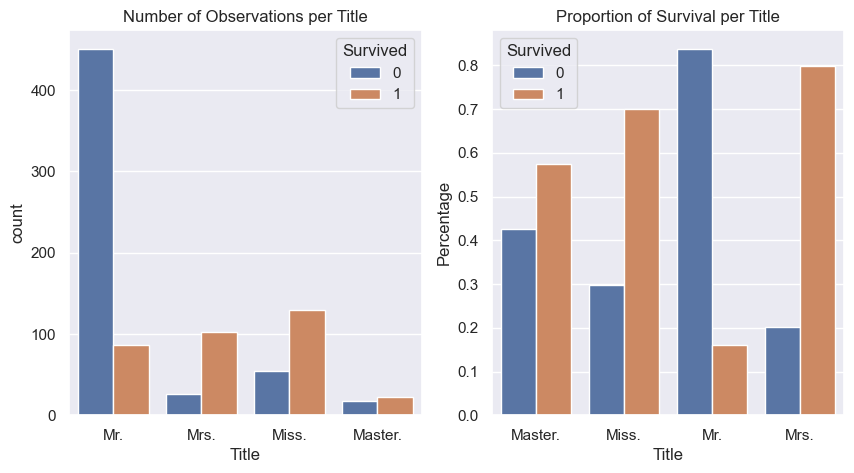

In [401]:
fix, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = 'Title', data = train, hue = 'Survived', ax = axes[0])
axes[0].set_title('Number of Observations per Title')

survival_rates = train.groupby('Title')["Survived"].value_counts(normalize = True).unstack() ### Group and normalize for percentage
# Reset index and melt into long format for seaborn
survival_long = survival_rates.reset_index().melt(id_vars='Title', value_name="Percentage")
sns.barplot(data=survival_long, x='Title', y="Percentage", hue="Survived", ax = axes[1])
axes[1].set_title('Proportion of Survival per Title');

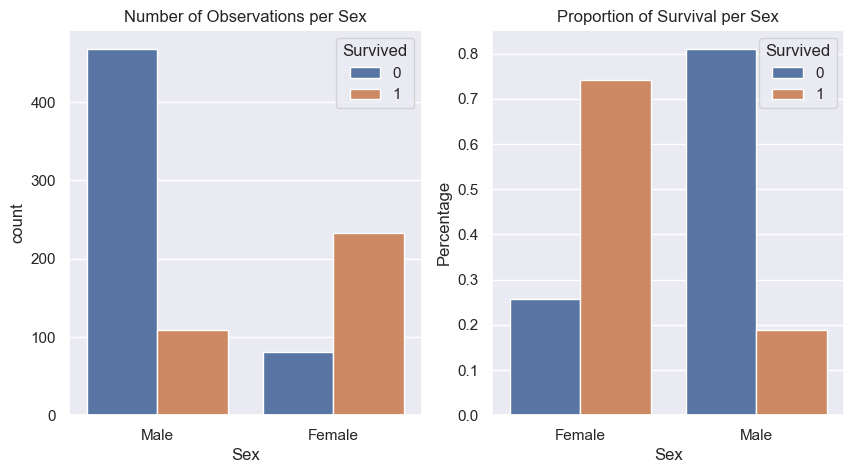

In [402]:
fix, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = 'Sex', data = train, hue = 'Survived', ax = axes[0])
axes[0].set_title('Number of Observations per Sex')

survival_rates = train.groupby('Sex')["Survived"].value_counts(normalize = True).unstack() ### Group and normalize for percentage
# Reset index and melt into long format for seaborn
survival_long = survival_rates.reset_index().melt(id_vars='Sex', value_name="Percentage")
sns.barplot(data=survival_long, x='Sex', y="Percentage", hue="Survived", ax = axes[1])
axes[1].set_title('Proportion of Survival per Sex');


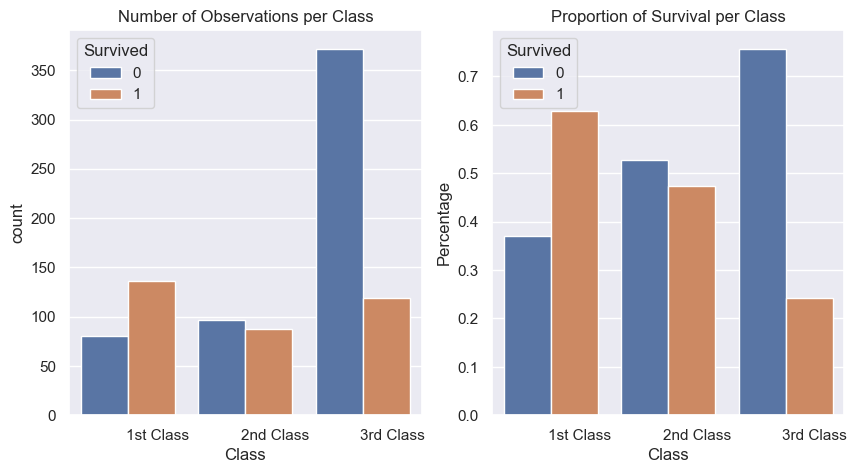

In [403]:
fix, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = 'Pclass', data = train, hue = 'Survived', ax = axes[0])
axes[0].set_title('Number of Observations per Class')
x = np.arange(len(pd.unique(train.Pclass)))
width = 0.25
axes[0].set_xlabel('Class')
axes[0].set_xticks(ticks =x + width, labels = ['1st Class', '2nd Class', '3rd Class']);

survival_rates = train.groupby('Pclass')["Survived"].value_counts(normalize = True).unstack() ### Group and normalize for percentage
# Reset index and melt into long format for seaborn
survival_long = survival_rates.reset_index().melt(id_vars='Pclass', value_name="Percentage")
sns.barplot(data=survival_long, x='Pclass', y="Percentage", hue="Survived", ax = axes[1])
axes[1].set_title('Proportion of Survival per Class');
axes[1].set_xlabel('Class')
axes[1].set_xticks(ticks =x + width, labels = ['1st Class', '2nd Class', '3rd Class']);

In [404]:
import itertools
from scipy.stats import chi2_contingency

def best_segmentation(train_df, test_df, column, n_segments, n_candidates, test):
    """
    Finds the best segmentation (binning) of a continuous variable into n_segments bins
    based on minimizing the chi-squared test p-value for independence with the "Survived" column,
    and then adds the binned column as a new column (named column+'New') to both the training and test dataframes.
    
    Parameters:
      train_df    : pandas.DataFrame
                    The training dataframe containing the data.
      test_df     : pandas.DataFrame
                    The test dataframe that will receive the segmented version of the column.
      column      : str
                    The name of the continuous column to segment.
      n_segments  : int
                    The desired number of bins.
      n_candidates: int
                    The number of evenly spaced candidate endpoints between the min and max of train_df[column].
    
    Returns:
      None. The function modifies train_df and test_df in place.
    """
    # Generate candidate endpoints from the training data.
    col_data = train_df[column]
    #candidates = np.linspace(col_data.min(), col_data.max(), n_candidates)
    
    best_p = 1.0
    best_endpoints = None

    quants = np.quantile(a = col_data, q = [j / n_candidates for j in range(1, n_candidates)])
    # To create n_segments bins, we need n_segments - 1 endpoints.
    #for endpoints in itertools.combinations(candidates, n_segments - 1):\
    for endpoints in itertools.combinations(quants, n_segments - 1):
        #endpoints = sorted(np.random.choice(col_data, size = n_segments - 1, replace=False))
        # np.digitize assigns bins as follows:
        #   Bin 0: values < endpoints[0]
        #   Bin i: endpoints[i-1] <= value < endpoints[i] for i=1,...,len(endpoints)
        #   Bin len(endpoints): values >= endpoints[-1]
        segmentation = np.digitize(col_data, endpoints, right=False)
        if test == 'Chi2':
             # Build the contingency table for the chi-squared test.
            contingency_table = pd.crosstab(segmentation, train_df['Survived'])
            _, p, _, _ = chi2_contingency(contingency_table)
        elif test == 'Fisher':
            p = 0
            for i in range(n_segments - 1):
                contingency_table = pd.crosstab(((segmentation == i) | (segmentation == i + 1)).astype('int'), train_df['Survived'])
                if contingency_table.shape != (2,2):
                    continue
                _, p1 = fisher_exact(contingency_table)
                p = p + p1
        if p < best_p:
            best_p = p
            best_endpoints = endpoints
    if best_endpoints is None:
        raise ValueError("No valid endpoints found. Check your parameters.")
    
    # Add the new segmentation column to both dataframes.
    new_col = column + 'New'
    trainCol = np.digitize(train_df[column], best_endpoints, right=False)
    testCol = np.digitize(test_df[column], best_endpoints, right=False)
    return best_endpoints, best_p, trainCol, testCol


In [405]:
train1stClass = train.loc[train.Pclass == 1, :]
test1stClass = test.loc[test.Pclass == 1, :]
train2ndClass = train.loc[train.Pclass == 2, :]
test2ndClass = test.loc[test.Pclass == 2, :]
train3rdClass = train.loc[train.Pclass == 3, :]
test3rdClass = test.loc[test.Pclass == 3, :]

In [406]:
endpoints1, p1, trainCol1, testCol1 = best_segmentation(train1stClass, test1stClass, 'Fare', 2, 50, test = 'Chi2')
endpoints2, p2, trainCol2, testCol2 = best_segmentation(train2ndClass, test2ndClass, 'Fare', 2, 50, test = 'Chi2')
endpoints3, p3, trainCol3, testCol3 = best_segmentation(train3rdClass, test3rdClass, 'Fare', 2, 50, test = 'Chi2')

In [407]:
endpoints2

(18.255129123376644,)

In [408]:
def classFare(x ,y):
    if x == 1:
        if y > endpoints1[0]:
            return '1st Class\High Fare'
        else: 
            return '1st Class\Low Fare'
    elif x == 2:
        if y > endpoints2[0]:
            return '2nd Class\High Fare'
        else: 
            return '2nd Class\Low Fare'
    else: 
        if y > endpoints3[0]:
            return '3rd Class\High Fare'
        else: 
            return '3rd Class\Low Fare'

train['ClassFare'] = train.apply(lambda x: classFare(x['Pclass'], x['Fare']), axis = 1)
test['ClassFare'] = test.apply(lambda x: classFare(x['Pclass'], x['Fare']), axis = 1)

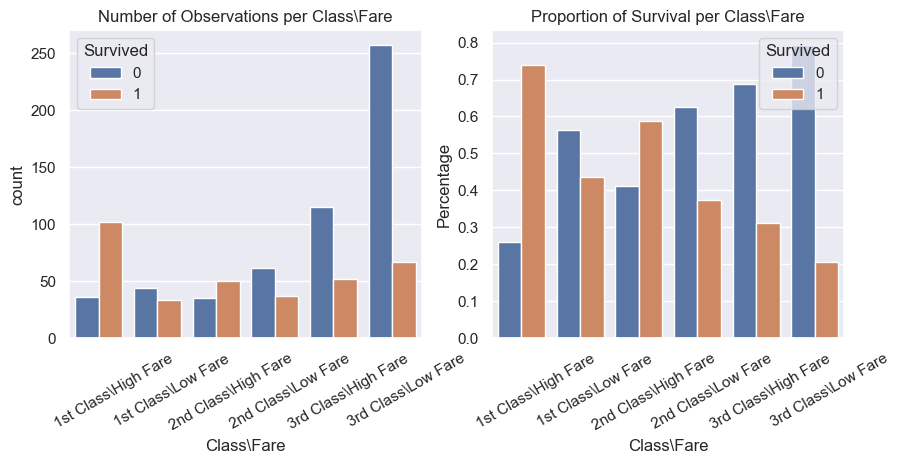

In [409]:
fix, axes = plt.subplots(1, 2, figsize = (10, 4))
labels = ['1st Class\High Fare', '1st Class\Low Fare', '2nd Class\High Fare',
         '2nd Class\Low Fare', '3rd Class\High Fare', '3rd Class\Low Fare']
sns.countplot(x = 'ClassFare', data = train, hue = 'Survived', ax = axes[0],
             order = labels)
axes[0].set_title('Number of Observations per Class\Fare')
x = np.arange(len(pd.unique(train.ClassFare)))
width = 0.25
axes[0].set_xlabel('Class\Fare')
axes[0].set_xticks(ticks =x + width, labels = labels, rotation = 30);

survival_rates = train.groupby('ClassFare')["Survived"].value_counts(normalize = True).unstack() ### Group and normalize for percentage
# Reset index and melt into long format for seaborn
survival_long = survival_rates.reset_index().melt(id_vars='ClassFare', value_name="Percentage")
sns.barplot(data=survival_long, x='ClassFare', y="Percentage", hue="Survived", ax = axes[1])
axes[1].set_title('Proportion of Survival per Class\Fare');
axes[1].set_xlabel('Class\Fare')
axes[1].set_xticks(ticks =x + width, labels = labels, rotation = 30);


In [410]:
# Function to compute survival percentages per FareGroup
def compute_survival_absolute(df, to_split, to_group):
    levels = np.sort(pd.unique(df[to_split]))
    n_plots = len(levels)
    k = len(pd.unique(df[to_group]))
    nRows = int(np.ceil(len(levels) / 2))
    nCols = 2
    if nRows > 1 and n_plots % 2 == 1:
        fig, axes = plt.subplots(nRows - 1, nCols, figsize=(10, 3 * nRows))
    else:
        fig, axes = plt.subplots(nRows, nCols, figsize=(10, 3 * nRows))
    for j in range(len(levels)):
        data = df.loc[df[to_split] == levels[j]] ### get subsample
        if n_plots == 2 or n_plots == 3:
            if ((n_plots == 3) and (j < 2)) or n_plots == 2:
                sns.countplot(data=data, x=to_group, hue="Survived", ax=axes[j % 2], order = np.sort(pd.unique(df[to_group])))
                axes[j % 2].set_xticks(np.arange(k))
                axes[j % 2].set_title(levels[j % 2])
                if j % 2 == 0:
                    axes[j % 2].set_ylabel("Total")
                else:
                    axes[j % 2].set_ylabel("")
                axes[j % 2].set_xticklabels(axes[j % 2].get_xticklabels(), rotation = 30)
            else:
                fig.subplots_adjust(bottom= 2 / 3)
                ax = fig.add_axes([0.2, 0.15, 0.6, 1 / (nRows + 1)])
                sns.countplot(data=data, x=to_group, hue="Survived", order = np.sort(pd.unique(df[to_group])))
                ax.set_title(levels[j])
                ax.set_xlabel(to_group)
                ax.set_xticks(np.arange(k))
                ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
                
        else:
            if (n_plots % 2 == 1) and (j ==  2 * nRows - 2):
                plt.tight_layout()
                fig.subplots_adjust(bottom= 1 - 2 / (nRows + 1))
                ax = fig.add_axes([0.2, 0.15, 0.6, 1 / (nRows + 1)])
                sns.countplot(data=data, x=to_group, hue="Survived", order = np.sort(pd.unique(df[to_group])))
                ax.set_title(levels[j])
                ax.set_xlabel(to_group)
                ax.set_xticks(np.arange(k))
                ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
            else:
                sns.countplot(data=data, x=to_group, hue="Survived", ax=axes[j // 2, j % 2], order = np.sort(pd.unique(df[to_group])))
                axes[j // 2, j % 2].set_xticks(np.arange(k))
                axes[j // 2, j % 2].set_title(levels[j])
                axes[j // 2, j % 2].set_xlabel(to_group)
                if j % 2 == 0:
                    axes[j // 2, j % 2].set_ylabel("Total")
                else:
                    axes[j // 2, j % 2].set_ylabel("")
                axes[j // 2, j % 2].set_xticklabels(axes[j // 2, j % 2].get_xticklabels(), rotation = 30)
        if n_plots % 2 == 0:
            plt.tight_layout()


In [411]:
# Function to compute survival percentages per FareGroup
def compute_survival_percentage(df, to_split, to_group):
    """
    A function to plot the survival proportion inside different levels of a categorical levels,
    for subpopulations of another categorical variable.

    Parameters:
        df        : dataframe
        to_split  : Str
                    The categorical column we want to split the data for multiple plots
        to_split  : Str
                    The categorical column we want to split the data inside each plot            
    """
    levels = np.sort(pd.unique(df[to_split]))
    n_plots = len(levels)
    k = len(pd.unique(df[to_group]))
    nRows = int(np.ceil(len(levels) / 2))
    nCols = 2
    if nRows > 1 and n_plots % 2 == 1:
        fig, axes = plt.subplots(nRows - 1, nCols, figsize=(10, 3 * nRows))
    else:
        fig, axes = plt.subplots(nRows, nCols, figsize=(10, 3 * nRows))
    for j in range(len(levels)):
        data = df.loc[df[to_split] == levels[j]] ### get subsample
        survival_rates = data.groupby(to_group)["Survived"].value_counts(normalize = True).unstack() ### Group and normalize for percentage
        # Reset index and melt into long format for seaborn
        survival_long = survival_rates.reset_index().melt(id_vars=to_group, value_name="Percentage")
        if n_plots == 2 or n_plots == 3:
            if ((n_plots == 3) and (j < 2)) or n_plots == 2:
                sns.barplot(data=survival_long, x=to_group, y="Percentage", hue="Survived", ax=axes[j % 2],
                           order = np.sort(pd.unique(df[to_group])))
                axes[j % 2].set_xticks(np.arange(k))
                axes[j % 2].set_title(levels[j % 2])
                if j % 2 == 0:
                    axes[j % 2].set_ylabel("Total")
                else:
                    axes[j % 2].set_ylabel("")
                axes[j % 2].set_xticklabels(axes[j % 2].get_xticklabels(), rotation = 30)
            else:
                fig.subplots_adjust(bottom= 2 / 3)
                ax = fig.add_axes([0.2, 0.15, 0.6, 1 / (nRows + 1)])
                sns.barplot(data=survival_long, x=to_group, y="Percentage", hue="Survived",
                           order = np.sort(pd.unique(df[to_group])))
                ax.set_title(levels[j])
                ax.set_xlabel(to_group)
                ax.set_xticks(np.arange(k))
                ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
        else:
            if (n_plots % 2 == 1) and (j ==  2 * nRows - 2):
                fig.subplots_adjust(bottom= 1 - 2 / (nRows + 1))
                ax = fig.add_axes([0.2, 0.15, 0.6, 1 / (nRows + 1)])
                sns.barplot(data=survival_long, x=to_group, y="Percentage", hue="Survived",
                            order = np.sort(pd.unique(df[to_group])))
                ax.set_title(levels[j])
                ax.set_xlabel(to_group)
                ax.set_xticks(np.arange(k))
                ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
            else:
                sns.barplot(data=survival_long, x=to_group, y="Percentage", hue="Survived", 
                            ax=axes[j // 2, j % 2], order = np.sort(pd.unique(df[to_group])))
                axes[j // 2, j % 2].set_xticks(np.arange(k))
                axes[j // 2, j % 2].set_title(levels[j])
                axes[j // 2, j % 2].set_xlabel(to_group)
                if j % 2 == 0:
                    axes[j // 2, j % 2].set_ylabel("Total")
                else:
                    axes[j // 2, j % 2].set_ylabel("")
                axes[j // 2, j % 2].set_xticklabels(axes[j // 2, j % 2].get_xticklabels(), rotation = 30)
        if n_plots % 2 == 0:
            plt.tight_layout()

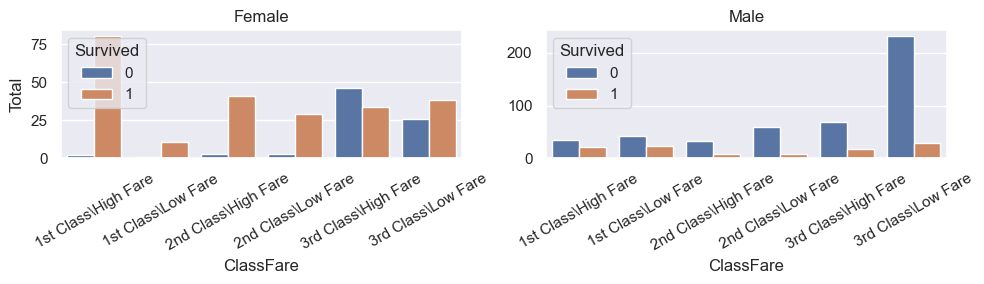

In [412]:
compute_survival_absolute(train, to_split='Sex', to_group='ClassFare')

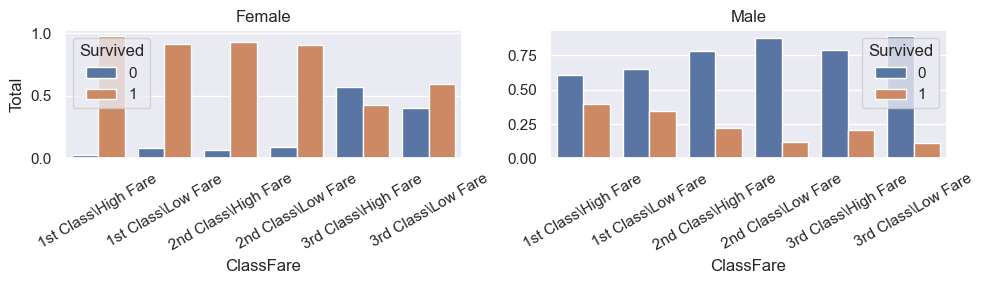

In [413]:
compute_survival_percentage(train, to_split='Sex', to_group='ClassFare')

In [414]:
train1stClass = train.loc[train.Pclass == 1, :]
test1stClass = test.loc[test.Pclass == 1, :]
train2ndClass = train.loc[train.Pclass == 2, :]
test2ndClass = test.loc[test.Pclass == 2, :]
train3rdClass = train.loc[train.Pclass == 3, :]
test3rdClass = test.loc[test.Pclass == 3, :]

def chi2Subpopulations(df, to_split, to_test, sep):
    p_vals = []
    levels = sorted(pd.unique(df[to_split]))
    for lev in levels:
        subDf = df.loc[df[to_split] == lev, :]
        newCol = (subDf[to_test] >= sep).astype('int')
        newSurv = subDf['Survived']
        contingency_table = pd.crosstab(newCol, newSurv)
        _, p, _, _ = chi2_contingency(contingency_table)
        p_vals.append((lev,p))
    return(p_vals)
res1 = chi2Subpopulations(train1stClass, to_split='Sex', to_test='Fare', sep = endpoints1[0])
res2 = chi2Subpopulations(train2ndClass, to_split='Sex', to_test='Fare', sep = endpoints1[0])
res3 = chi2Subpopulations(train3rdClass, to_split='Sex', to_test='Fare', sep = endpoints1[0])
print("1st Class", res1[0][0], 'P-value:', res1[0][1])
print("1st Class", res1[1][0], 'P-value:', res1[1][1])
print("2nd Class", res2[0][0], 'P-value:', res2[0][1])
print("2nd Class", res2[1][0], 'P-value:', res2[1][1])
print("3rd Class", res3[0][0], 'P-value:', res3[0][1])
print("3rd Class", res3[1][0], 'P-value:', res3[1][1])

1st Class Female P-value: 0.8369721745449503
1st Class Male P-value: 0.7505557888383733
2nd Class Female P-value: 1.0
2nd Class Male P-value: 0.7181506464182896
3rd Class Female P-value: 0.2432427057426535
3rd Class Male P-value: 0.007033768473790813


In [415]:
d = {'1st Class\High Fare' : '1st Class', '1st Class\Low Fare' : '1st Class',
    '2nd Class\High Fare' : '2nd Class', '2nd Class\Low Fare' : '2nd Class',
    '3rd Class\High Fare' : '3rd Class', '3rd Class\Low Fare' : '3rd Class'}

train['Class'] = train.ClassFare.map(d)
test['Class'] = test.ClassFare.map(d)

train.drop(['ClassFare', 'Fare', 'Pclass'], inplace = True, axis = 1)
test.drop(['ClassFare', 'Fare', 'Pclass'], inplace = True, axis = 1)

In [416]:
endpoints, p, trainCol, testCol = best_segmentation(train, test, 'Age', 4, 20, test = 'Fisher')

In [417]:
endpoints

(6.0, 21.0, 48.0)

In [418]:
d = {0: 'Kids', 1: 'Teens', 2: 'Adults', 3: 'Old'}
train['AgeGroup'] = pd.Series(trainCol).map(d)
test['AgeGroup'] = pd.Series(testCol).map(d)

#train.drop('Age', axis = 1, inplace = True)
#test.drop('Age', axis = 1, inplace = True)

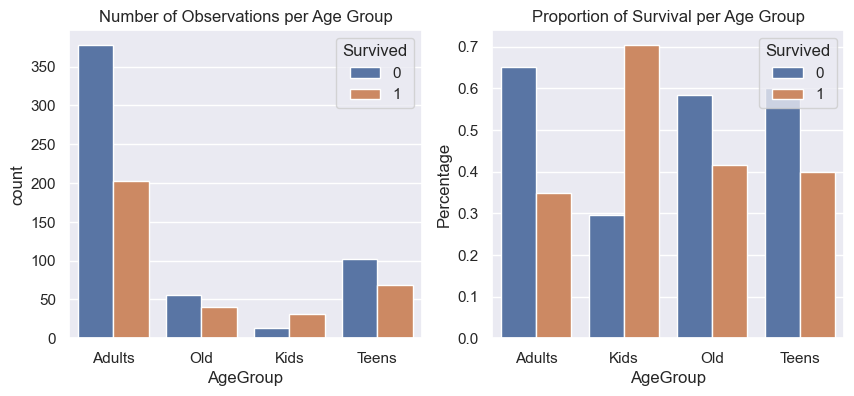

In [419]:
fix, axes = plt.subplots(1, 2, figsize = (10, 4))
sns.countplot(x = 'AgeGroup', data = train, hue = 'Survived', ax = axes[0])
axes[0].set_title('Number of Observations per Age Group')

survival_rates = train.groupby('AgeGroup')["Survived"].value_counts(normalize = True).unstack() ### Group and normalize for percentage
# Reset index and melt into long format for seaborn
survival_long = survival_rates.reset_index().melt(id_vars='AgeGroup', value_name="Percentage")
sns.barplot(data=survival_long, x='AgeGroup', y="Percentage", hue="Survived", ax = axes[1])
axes[1].set_title('Proportion of Survival per Age Group');

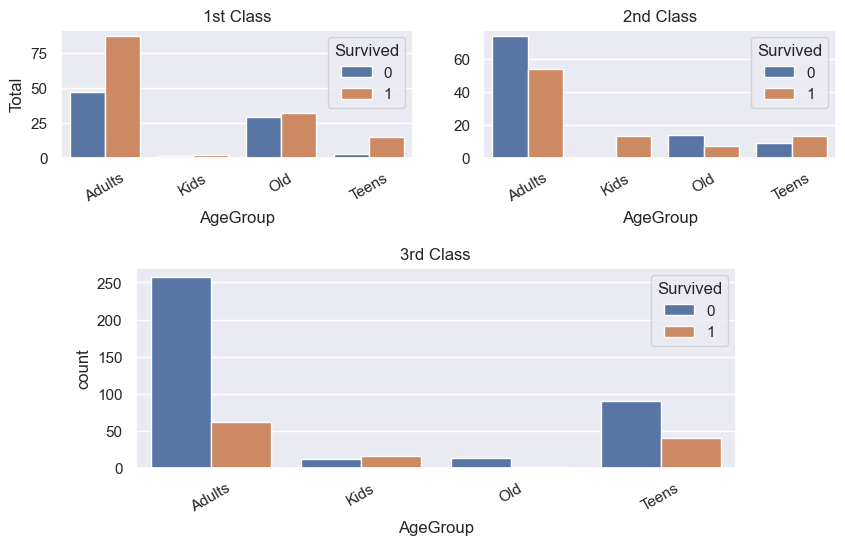

In [420]:
compute_survival_absolute(train, to_split='Class', to_group='AgeGroup')

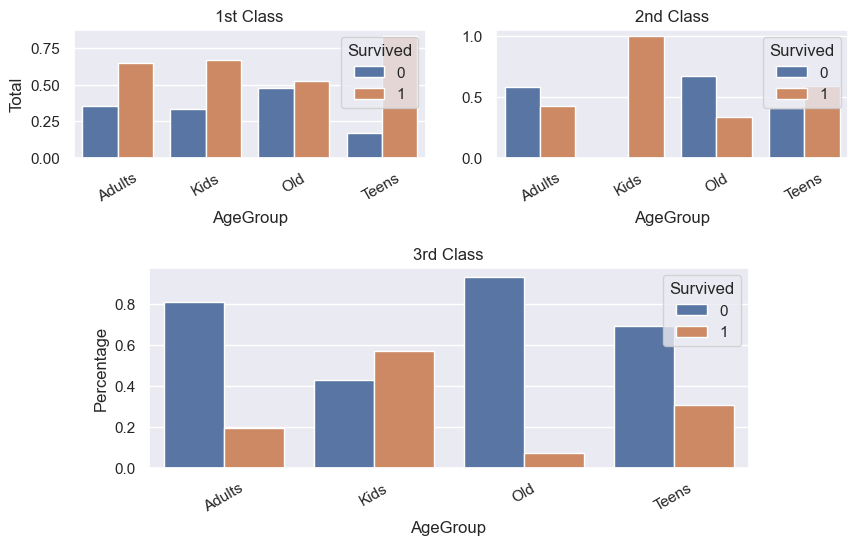

In [421]:
compute_survival_percentage(train, to_split='Class', to_group='AgeGroup')

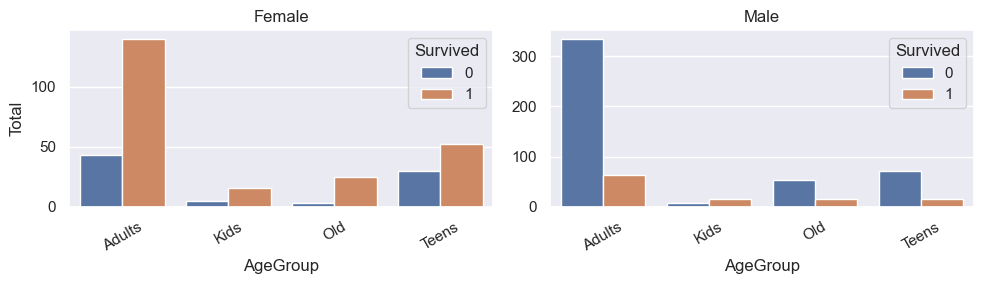

In [422]:
compute_survival_absolute(train, to_split='Sex', to_group='AgeGroup')

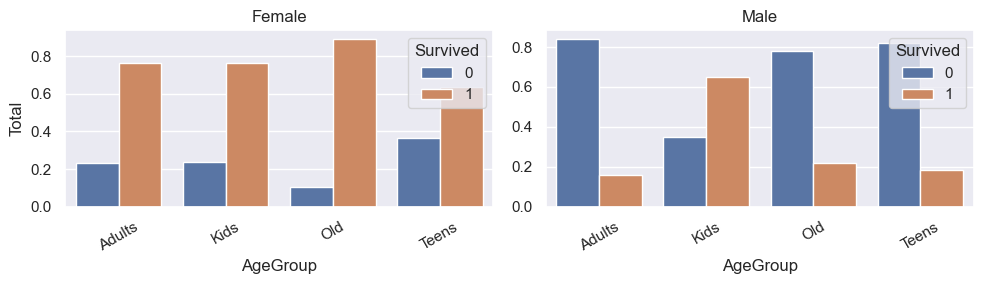

In [423]:
compute_survival_percentage(train, to_split='Sex', to_group='AgeGroup')

In [424]:
import statsmodels.api as sm

# Prepare the data
X = sm.add_constant(train['Age'])  # add intercept
y = train['Survived']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# View the summary with coefficients, standard errors, and confidence intervals
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.662244
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                0.005509
Time:                        06:43:37   Log-Likelihood:                -590.06
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                   0.01057
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0950      0.163     -0.582      0.560      -0.415       0.225
Age           -0.0129      0.

In [425]:
# Prepare the data
X = sm.add_constant(train.loc[train.Sex == 'Male', 'Age'])  # add intercept
y = train.loc[train.Sex == 'Male', 'Survived']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# View the summary with coefficients, standard errors, and confidence intervals
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.479594
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  577
Model:                          Logit   Df Residuals:                      575
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                 0.01040
Time:                        06:43:38   Log-Likelihood:                -276.73
converged:                       True   LL-Null:                       -279.63
Covariance Type:            nonrobust   LLR p-value:                   0.01586
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8824      0.257     -3.431      0.001      -1.386      -0.378
Age           -0.0191      0.

In [426]:
# Prepare the data
X = sm.add_constant(train.loc[train.Sex == 'Female', 'Age'])  # add intercept
y = train.loc[train.Sex == 'Female', 'Survived']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# View the summary with coefficients, standard errors, and confidence intervals
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.558875
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  314
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                 0.02109
Time:                        06:43:38   Log-Likelihood:                -175.49
converged:                       True   LL-Null:                       -179.27
Covariance Type:            nonrobust   LLR p-value:                  0.005965
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3495      0.284      1.229      0.219      -0.208       0.907
Age            0.0275      0.

In [427]:
# Prepare the data
X = sm.add_constant(train1stClass.loc[:, 'Age'])  # add intercept
y = train1stClass.loc[:, 'Survived']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# View the summary with coefficients, standard errors, and confidence intervals
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.621762
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  216
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                 0.05672
Time:                        06:43:39   Log-Likelihood:                -134.30
converged:                       True   LL-Null:                       -142.38
Covariance Type:            nonrobust   LLR p-value:                 5.844e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2082      0.472      4.682      0.000       1.284       3.133
Age           -0.0424      0.

In [428]:
# Prepare the data
X = sm.add_constant(train2ndClass.loc[:, 'Age'])  # add intercept
y = train2ndClass.loc[:, 'Survived']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# View the summary with coefficients, standard errors, and confidence intervals
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.645125
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                 0.06729
Time:                        06:43:39   Log-Likelihood:                -118.70
converged:                       True   LL-Null:                       -127.27
Covariance Type:            nonrobust   LLR p-value:                 3.494e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3216      0.400      3.302      0.001       0.537       2.106
Age           -0.0474      0.

In [429]:
# Prepare the data
X = sm.add_constant(train3rdClass.loc[:, 'Age'])  # add intercept
y = train3rdClass.loc[:, 'Survived']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# View the summary with coefficients, standard errors, and confidence intervals
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530064
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  491
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                 0.04284
Time:                        06:43:41   Log-Likelihood:                -260.26
converged:                       True   LL-Null:                       -271.91
Covariance Type:            nonrobust   LLR p-value:                 1.388e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0137      0.255     -0.054      0.957      -0.513       0.486
Age           -0.0472      0.

In [430]:
train.drop('AgeGroup', axis = 1, inplace = True)
test.drop('AgeGroup', axis = 1, inplace = True)

In [431]:
train

,Age,SibSp,Parch,Survived,Embarked,Sex,Title,FamilyOutcome,Class
0,22.000000,1.0,0.0,0,S,Male,Mr.,0,3rd Class
1,38.000000,1.0,0.0,1,C,Female,Mrs.,1,1st Class
2,26.000000,0.0,0.0,1,S,Female,Miss.,1,3rd Class
3,35.000000,1.0,0.0,1,S,Female,Mrs.,0,1st Class
4,35.000000,0.0,0.0,0,S,Male,Mr.,1,3rd Class
...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,0,S,Male,Mr.,1,2nd Class
887,19.000000,0.0,0.0,1,S,Female,Miss.,1,1st Class
888,17.155111,1.0,2.0,0,S,Female,Miss.,0,3rd Class
889,26.000000,0.0,0.0,1,C,Male,Mr.,1,1st Class


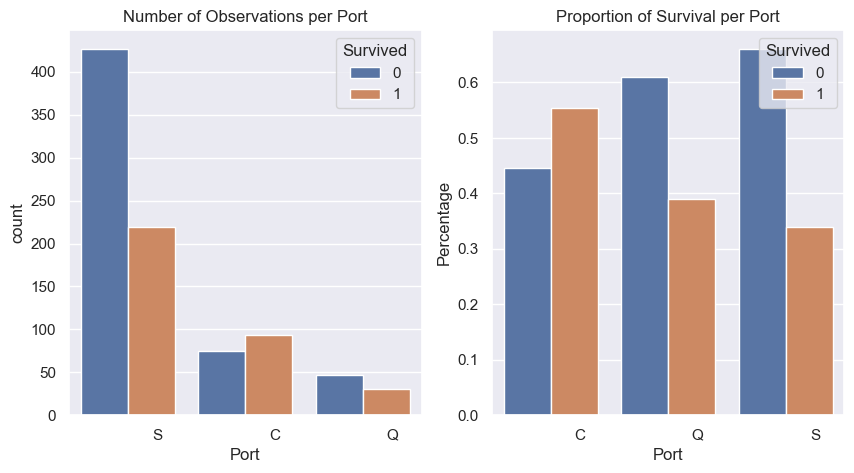

In [432]:
fix, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = 'Embarked', data = train, hue = 'Survived', ax = axes[0])
axes[0].set_title('Number of Observations per Port')
x = np.arange(len(pd.unique(train.Embarked)))
width = 0.25
axes[0].set_xlabel('Port')
axes[0].set_xticks(ticks =x + width);

survival_rates = train.groupby('Embarked')["Survived"].value_counts(normalize = True).unstack() ### Group and normalize for percentage
# Reset index and melt into long format for seaborn
survival_long = survival_rates.reset_index().melt(id_vars='Embarked', value_name="Percentage")
sns.barplot(data=survival_long, x='Embarked', y="Percentage", hue="Survived", ax = axes[1])
axes[1].set_title('Proportion of Survival per Port');
axes[1].set_xlabel('Port')
axes[1].set_xticks(ticks =x + width);

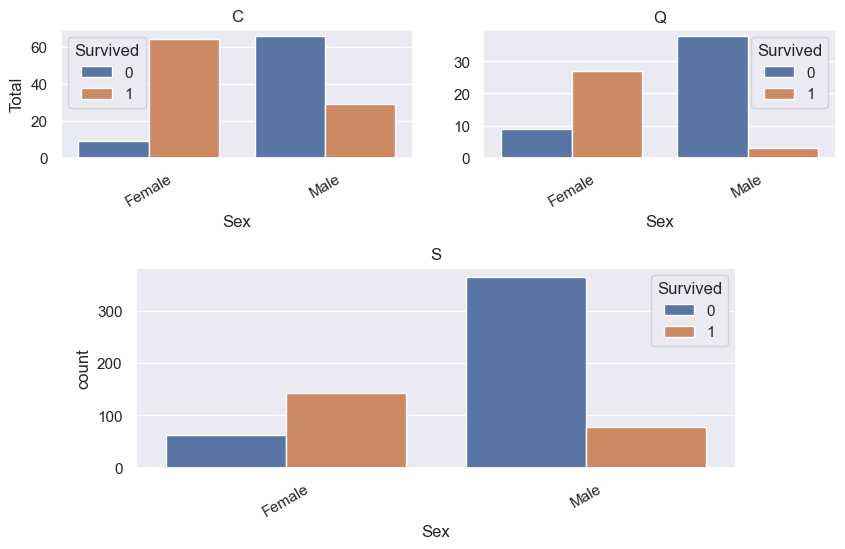

In [433]:
compute_survival_absolute(train, to_split='Embarked', to_group='Sex')

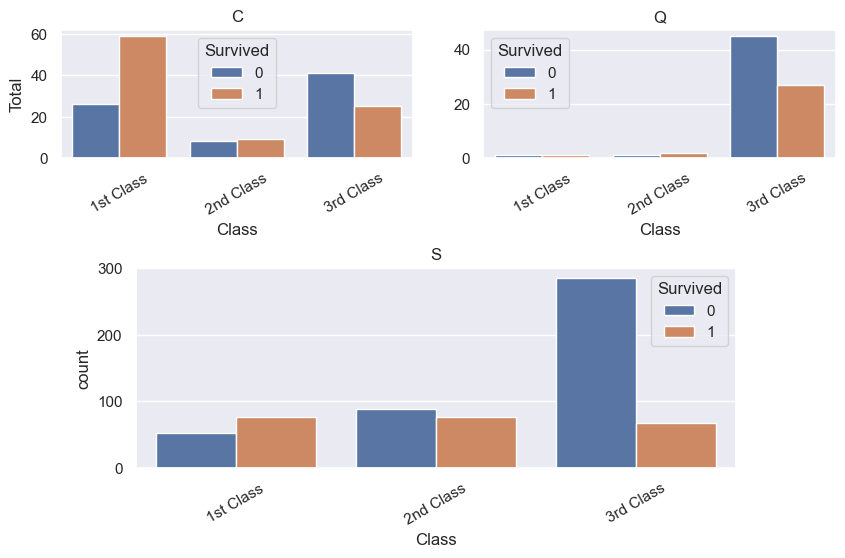

In [434]:
compute_survival_absolute(train, to_split='Embarked', to_group='Class')

In [435]:
train['ClassSex'] = train.Class + train.Sex

In [436]:
from scipy.stats import fisher_exact

def iterate_pairs(data):
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                yield data[i], data[j]
                
for j in pd.unique(train.ClassSex):
    print(j)
    subDf = train.loc[train.ClassSex == j,:]
    for pair in iterate_pairs(pd.unique(subDf.Embarked)):
        print(pair)
        subDf2 = subDf.loc[(train.Embarked == pair[0]) | (train.Embarked == pair[1]), :]
        contingency_table = pd.crosstab(subDf2.Embarked, subDf2.Survived)
        if contingency_table.shape != (2,2):
            continue
        print(contingency_table)
        _, p = fisher_exact(contingency_table)
        print(p)

3rd ClassMale
('S', 'Q')
Survived    0   1
Embarked         
Q          36   3
S         231  34
0.44306123670540964
('S', 'C')
Survived    0   1
Embarked         
C          33  10
S         231  34
0.09651310562994166
('Q', 'C')
Survived   0   1
Embarked        
C         33  10
Q         36   3
0.07163085184452506
1st ClassFemale
('C', 'S')
Survived  0   1
Embarked       
C         1  42
S         2  48
1.0
('C', 'Q')
Survived  0   1
Embarked       
C         1  42
Q         0   1
1.0
('S', 'Q')
Survived  0   1
Embarked       
Q         0   1
S         2  48
1.0
3rd ClassFemale
('S', 'C')
Survived   0   1
Embarked        
C          8  15
S         55  33
0.019825694829963252
('S', 'Q')
Survived   0   1
Embarked        
Q          9  24
S         55  33
0.000905234478035054
('C', 'Q')
Survived  0   1
Embarked       
C         8  15
Q         9  24
0.5690816233357147
1st ClassMale
('S', 'C')
Survived   0   1
Embarked        
C         25  17
S         51  28
0.693194984759524
('S', '

In [437]:
train.drop('Embarked', axis = 1, inplace = True)
test.drop('Embarked', axis = 1, inplace = True)
train.drop('ClassSex', axis = 1, inplace = True)

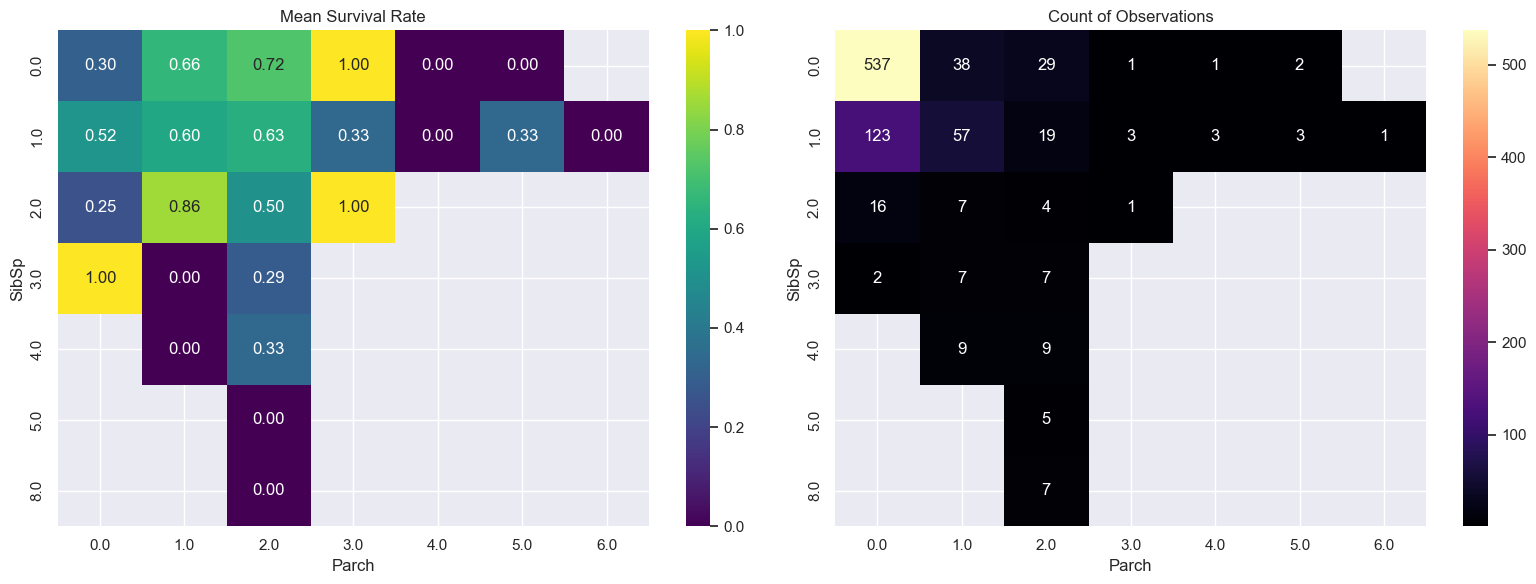

In [438]:
# Calculate the mean survival rate for each combination of SibSp and Parch
mean_survival = train.groupby(['SibSp', 'Parch'])['Survived'].mean().reset_index()
heatmap_mean = mean_survival.pivot(index='SibSp', columns='Parch', values='Survived')

# Calculate the count of observations for each combination
count_observations = train.groupby(['SibSp', 'Parch']).size().reset_index(name='Count')
heatmap_count = count_observations.pivot(index='SibSp', columns='Parch', values='Count')

# Create subplots to plot both heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the heatmap for the mean survival rate
sns.heatmap(heatmap_mean, annot=True, fmt=".2f", cmap="viridis", ax=axes[0])
axes[0].set_title("Mean Survival Rate")
axes[0].set_xlabel("Parch")
axes[0].set_ylabel("SibSp")

# Plot the heatmap for the count of observations
sns.heatmap(heatmap_count, annot=True, fmt=".0f", cmap="magma", ax=axes[1])
axes[1].set_title("Count of Observations")
axes[1].set_xlabel("Parch")
axes[1].set_ylabel("SibSp")

plt.tight_layout()
plt.show()


In [439]:
def FamilySize(x, y):
    if x == 0 and y == 0:
        return 'Alone'
    elif x <= 2 and y <= 1:
        return 'Small'
    else:
        return 'Large'

train['FamilySize'] = train.apply(lambda x: FamilySize(x['Parch'], x['SibSp']), axis = 1)
test['FamilySize'] = test.apply(lambda x: FamilySize(x['Parch'], x['SibSp']), axis = 1)

In [440]:
train.drop(['Sex', 'Parch','SibSp'], axis = 1, inplace = True)
test.drop(['Sex', 'Parch', 'SibSp'], axis = 1, inplace = True)

In [441]:
test

,Age,Title,FamilyOutcome,Class,FamilySize
0,34.500000,Mr.,1,3rd Class,Alone
1,47.000000,Mrs.,1,3rd Class,Small
2,62.000000,Mr.,1,2nd Class,Alone
3,27.000000,Mr.,1,3rd Class,Alone
4,22.000000,Mrs.,2,3rd Class,Small
...,...,...,...,...,...
413,30.517638,Mr.,1,3rd Class,Alone
414,39.000000,Mrs.,1,1st Class,Alone
415,38.500000,Mr.,1,3rd Class,Alone
416,30.517638,Mr.,1,3rd Class,Alone


In [442]:
train

,Age,Survived,Title,FamilyOutcome,Class,FamilySize
0,22.000000,0,Mr.,0,3rd Class,Small
1,38.000000,1,Mrs.,1,1st Class,Small
2,26.000000,1,Miss.,1,3rd Class,Alone
3,35.000000,1,Mrs.,0,1st Class,Small
4,35.000000,0,Mr.,1,3rd Class,Alone
...,...,...,...,...,...,...
886,27.000000,0,Mr.,1,2nd Class,Alone
887,19.000000,1,Miss.,1,1st Class,Alone
888,17.155111,0,Miss.,0,3rd Class,Small
889,26.000000,1,Mr.,1,1st Class,Alone


In [443]:
d = {'1st Class' : 1, '2nd Class' : 2, '3rd Class' : 3}

train['Class'] = train.Class.map(d)
test['Class'] = test.Class.map(d)

In [444]:
X_train = train.drop('Survived', axis = 1)

In [452]:
for col in X_train.columns:
    if col == 'FamilySize' or col == 'Title':
        X_train[col] = X_train[col].astype('category')
        test[col] = test[col].astype('category')
    else:
        X_train[col] = X_train[col].astype('float')
        test[col] = test[col].astype('float')

In [453]:
X_train.dtypes

Age               float64
Title            category
FamilyOutcome     float64
Class             float64
FamilySize       category
dtype: object

In [447]:
X_train

,Age,Title,FamilyOutcome,Class,FamilySize
0,22.000000,Mr.,0,3,Small
1,38.000000,Mrs.,1,1,Small
2,26.000000,Miss.,1,3,Alone
3,35.000000,Mrs.,0,1,Small
4,35.000000,Mr.,1,3,Alone
...,...,...,...,...,...
886,27.000000,Mr.,1,2,Alone
887,19.000000,Miss.,1,1,Alone
888,17.155111,Miss.,0,3,Small
889,26.000000,Mr.,1,1,Alone


In [448]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

cat_features = ['Title', 'FamilySize']

# Initialize CatBoostClassifier with verbose disabled for grid search
cat_model = CatBoostClassifier(cat_features=cat_features, verbose=0, iterations=1200, eval_fraction=0.1, early_stopping_rounds=7)

# Define the hyperparameter grid
param_grid = {
    'depth': [2, 3, 4],
    'learning_rate': [0.005 * j for j in range(1, 5)],
    'l2_leaf_reg': [0.001 * j for j in range(5)]
}

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',# You can change the scoring metric if desired
    n_jobs=3
)


grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found:  {'depth': 2, 'l2_leaf_reg': 0.0, 'learning_rate': 0.01}
Best cross-validation accuracy: 0.8439708743958321


In [449]:
catBoost = CatBoostClassifier(depth = grid_search.best_params_['depth'], iterations=1200, 
                              learning_rate = grid_search.best_params_['learning_rate'], cat_features=cat_features, 
                              l2_leaf_reg = grid_search.best_params_['l2_leaf_reg'])

X_train_1, X_val, y_train_1, y_val = train_test_split(
    X_train, y_train, test_size=0.1
)

catBoost.fit(X_train_1, y_train_1, early_stopping_rounds=7, eval_set = (X_val, y_val))
y_pred = catBoost.predict(test)
y_pred = pd.DataFrame({'PassengerId' : test_id, 'Survived' : y_pred})
y_pred.to_csv('SurvivalPredictionsCatBoost.csv', index = False)

0:	learn: 0.6868919	test: 0.6869994	best: 0.6869994 (0)	total: 9.67ms	remaining: 11.6s
1:	learn: 0.6802076	test: 0.6798483	best: 0.6798483 (1)	total: 25.5ms	remaining: 15.3s
2:	learn: 0.6742290	test: 0.6739833	best: 0.6739833 (2)	total: 43.3ms	remaining: 17.3s
3:	learn: 0.6684206	test: 0.6682900	best: 0.6682900 (3)	total: 63.9ms	remaining: 19.1s
4:	learn: 0.6627388	test: 0.6627228	best: 0.6627228 (4)	total: 81.2ms	remaining: 19.4s
5:	learn: 0.6566509	test: 0.6562429	best: 0.6562429 (5)	total: 98.4ms	remaining: 19.6s
6:	learn: 0.6507822	test: 0.6500367	best: 0.6500367 (6)	total: 112ms	remaining: 19.1s
7:	learn: 0.6454915	test: 0.6448719	best: 0.6448719 (7)	total: 128ms	remaining: 19.1s
8:	learn: 0.6403285	test: 0.6398346	best: 0.6398346 (8)	total: 142ms	remaining: 18.8s
9:	learn: 0.6352902	test: 0.6349218	best: 0.6349218 (9)	total: 155ms	remaining: 18.4s
10:	learn: 0.6303736	test: 0.6301305	best: 0.6301305 (10)	total: 169ms	remaining: 18.3s
11:	learn: 0.6255760	test: 0.6254579	best: 0.6

In [454]:
from xgboost import XGBClassifier
cat_features = ['Title', 'FamilySize']

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [1,2,3],
    'reg_alpha': [0.001 * j for j in range(3)],   # L1 regularization
    'reg_lambda': [0.001 * j for j in range(3)],      # L2 regularization
    'learning_rate': [0.01 + j * 0.01 for j in range(5)]
}

# Initialize the XGBClassifier.
# Set tree_method='hist' to support categorical features in recent XGBoost versions.
xgb = XGBClassifier(tree_method='hist', eval_metric='logloss', enable_categorical = True,
                   feature_types = ['q', 'c', 'q', 'q', 'c'],
                   max_cat_to_onehot = 1)

# Set up GridSearchCV to tune the model (using 3-fold cross-validation here)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters found: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'reg_alpha': 0.0, 'reg_lambda': 0.0}
Best cross-validation accuracy: 0.8428472788902142


In [464]:
# Now, to build the final model using early stopping, we split our training data further:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Use the best parameters found in GridSearchCV
best_params = grid_search.best_params_
xgb = XGBClassifier(n_estimators = grid_search.best_params_['n_estimators'],
                            max_depth = grid_search.best_params_['max_depth'], reg_alpha = grid_search.best_params_['reg_alpha'],
                            reg_lambda = grid_search.best_params_['reg_lambda'], learning_rate = grid_search.best_params_['learning_rate'],
                            tree_method='hist', enable_categorical = True, eval_metric='logloss', 
                            feature_types = ['q', 'c', 'q', 'q', 'c'], max_cat_to_onehot = 1,
                            early_stopping_rounds=10)

# Fit the model using early stopping to avoid overfitting.
xgb.fit(X_train_1, y_train_1, eval_set=[(X_val, y_val)], verbose=True)

# Optionally, predict on the test set
y_pred = xgb.predict(test)
y_pred = pd.DataFrame({'PassengerId' : test_id, 'Survived' : y_pred})
y_pred.to_csv('SurvivalPredictionsXGBoost.csv', index = False)

[0]	validation_0-logloss:0.68851
[1]	validation_0-logloss:0.68397
[2]	validation_0-logloss:0.67952
[3]	validation_0-logloss:0.67515
[4]	validation_0-logloss:0.67088
[5]	validation_0-logloss:0.66668
[6]	validation_0-logloss:0.66257
[7]	validation_0-logloss:0.65853
[8]	validation_0-logloss:0.65458
[9]	validation_0-logloss:0.65069
[10]	validation_0-logloss:0.64688
[11]	validation_0-logloss:0.64315
[12]	validation_0-logloss:0.63948
[13]	validation_0-logloss:0.63588
[14]	validation_0-logloss:0.63235
[15]	validation_0-logloss:0.62888
[16]	validation_0-logloss:0.62548
[17]	validation_0-logloss:0.62214
[18]	validation_0-logloss:0.61886
[19]	validation_0-logloss:0.61564
[20]	validation_0-logloss:0.61248
[21]	validation_0-logloss:0.60938
[22]	validation_0-logloss:0.60633
[23]	validation_0-logloss:0.60333
[24]	validation_0-logloss:0.60005
[25]	validation_0-logloss:0.59715
[26]	validation_0-logloss:0.59397
[27]	validation_0-logloss:0.59117
[28]	validation_0-logloss:0.58809
[29]	validation_0-loglos

In [457]:
X_val

,Age,Title,FamilyOutcome,Class,FamilySize
709,19.658589,Master.,2.0,3.0,Small
439,31.000000,Mr.,1.0,2.0,Alone
840,20.000000,Mr.,1.0,3.0,Alone
720,6.000000,Miss.,2.0,2.0,Small
39,14.000000,Miss.,2.0,3.0,Small
...,...,...,...,...,...
493,71.000000,Mr.,1.0,1.0,Alone
215,31.000000,Miss.,2.0,1.0,Small
309,30.000000,Miss.,1.0,1.0,Alone
822,38.000000,Mr.,1.0,1.0,Alone
